In [1]:
#Importing libraries 
import pandas as pd # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns  # type: ignore

In [2]:
#Importing data 
df = pd.read_csv('patient_data.csv')

In [3]:
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [4]:
df.rename(columns={'C': 'Gender'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [6]:
df.shape

(1825, 14)

In [7]:
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825
unique,2,4,2,2,3,3,2,2,3,3,5,5,2,6
top,Female,51-64,Yes,No,No,Moderate,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
freq,913,475,1657,984,744,697,976,940,984,625,1008,708,984,648


## Data Preprocessing 

In [8]:
#checking for null values
df.isnull().sum()

Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

In [9]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'HYPERTENSION (Stage-2).',
       'HYPERTENSIVE CRISI', 'NORMAL'], dtype=object)

In [10]:
df['Stages'].replace({'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS',
                      'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)'},
                     inplace=True)

C:\Users\suchi\AppData\Local\Temp\ipykernel_13988\768679657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stages'].replace({'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS',


In [11]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'NORMAL'], dtype=object)

In [12]:
df.head()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [13]:
df['Whendiagnoused'].unique()

array(['<1 Year', '1 - 5 Years', '>5 Years'], dtype=object)

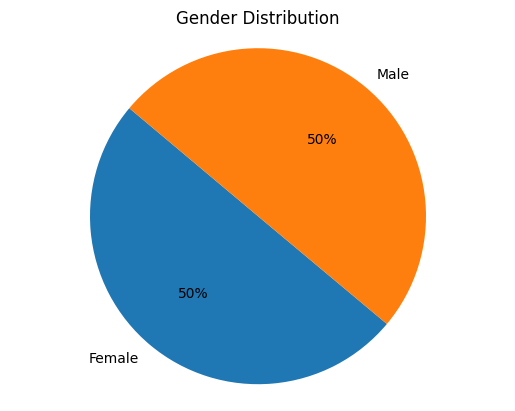

In [14]:
gender_counts = df['Gender'].value_counts()

# Plotting the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal') 
plt.show()

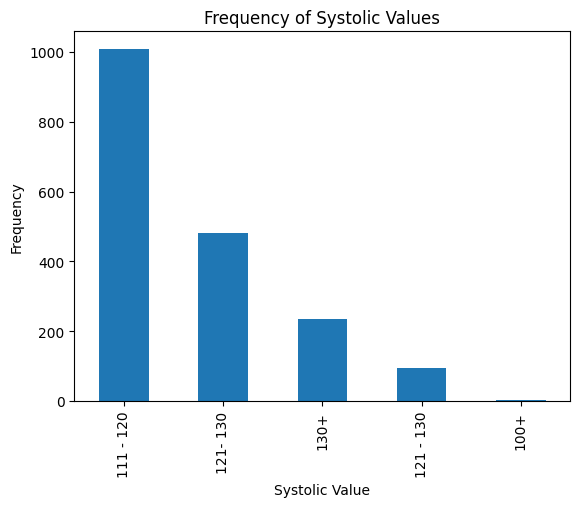

In [15]:
frequency = df['Systolic'].value_counts()

frequency.plot(kind='bar')
plt.xlabel('Systolic Value')
plt.ylabel('Frequency')
plt.title('Frequency of Systolic Values')
plt.show()

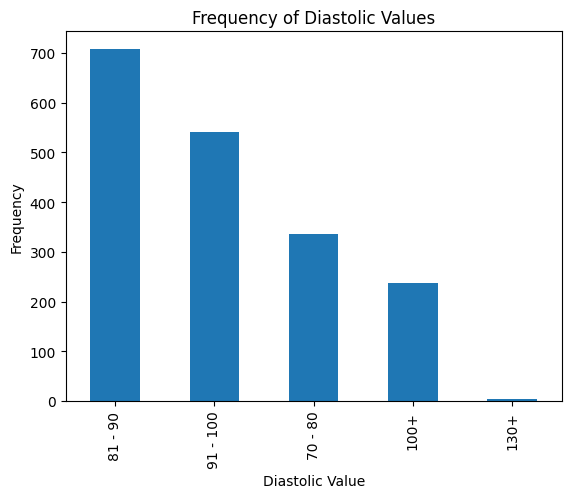

In [16]:
frequency = df['Diastolic'].value_counts()

frequency.plot(kind='bar')
plt.xlabel('Diastolic Value')
plt.ylabel('Frequency')
plt.title('Frequency of Diastolic Values')
plt.show()

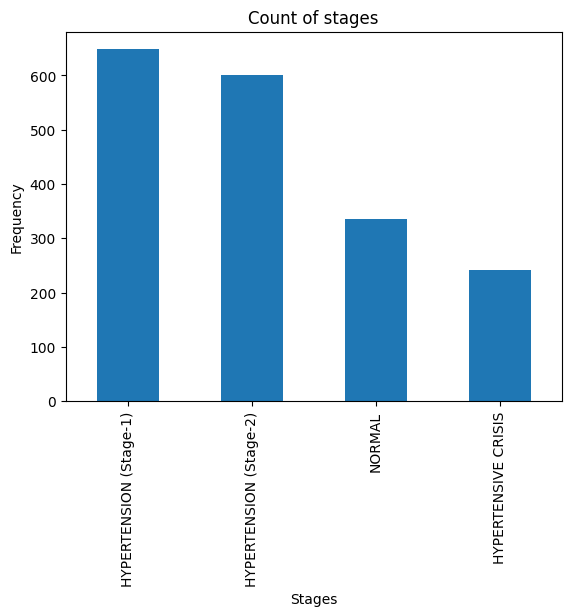

In [17]:
frequency = df['Stages'].value_counts()

frequency.plot(kind='bar')
plt.xlabel('Stages')
plt.ylabel('Frequency')
plt.title('Count of stages')
plt.show()

In [18]:
df['Whendiagnoused'].unique()

array(['<1 Year', '1 - 5 Years', '>5 Years'], dtype=object)

In [19]:
df['Age'].unique()

array(['18-34', '35-50', '51-64', '65+'], dtype=object)

In [20]:
#converting categorical into numerical value 
from sklearn.preprocessing import LabelEncoder

columns = ['Gender' ,'Severity' ,'History' , 'Patient','TakeMedication', 'BreathShortness',
            'VisualChanges','NoseBleeding','ControlledDiet','Stages']

label_encoder = LabelEncoder()
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])


In [21]:
df
#(1 = Male, 0 = Female)(1 = yes, 0 = no)


,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,18-34,1,0,0,0,0,0,1,<1 Year,111 - 120,81 - 90,0,0
1,0,18-34,1,0,0,0,0,0,1,<1 Year,111 - 120,81 - 90,0,0
2,1,35-50,1,0,0,0,0,0,1,<1 Year,111 - 120,81 - 90,0,0
3,0,35-50,1,0,0,0,0,0,1,<1 Year,111 - 120,81 - 90,0,0
4,1,51-64,1,0,0,0,0,0,1,<1 Year,111 - 120,81 - 90,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,35-50,1,0,0,2,0,0,1,>5 Years,111 - 120,70 - 80,0,3
1821,1,51-64,1,0,0,2,0,0,1,>5 Years,111 - 120,70 - 80,0,3
1822,0,51-64,1,0,0,2,0,0,1,>5 Years,111 - 120,70 - 80,0,3
1823,1,65+,1,0,0,2,0,0,1,>5 Years,111 - 120,70 - 80,0,3


In [22]:
# Replace '+' with a large number in 'Systolic' and 'Diastolic' columns
df['Systolic'] = df['Systolic'].astype(str).str.replace('+', '150')
df['Diastolic'] = df['Diastolic'].astype(str).str.replace('+', '150')

# Convert range values to the average in 'Systolic' and 'Diastolic' columns
df['Systolic'] = df['Systolic'].apply(lambda x: int((int(x.split('-')[0].strip()) + int(x.split('-')[1].strip())) / 2) if '-' in x else int(x))
df['Diastolic'] = df['Diastolic'].apply(lambda x: int((int(x.split('-')[0].strip()) + int(x.split('-')[1].strip())) / 2) if '-' in x else int(x))

# Convert categorical values to numerical values in 'Whendiagnoused' column
df['Whendiagnoused'] = df['Whendiagnoused'].map({'<1 Year': 0, '1 - 5 Years': 3, '>5 Years': 6})
df['Age'] = df['Age'].map({'18-34': 0, '35-50': 1,'51-64': 2, '65+': 3})

In [23]:
df.head()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,1,0,0,0,0,0,1,0,115,85,0,0
1,0,0,1,0,0,0,0,0,1,0,115,85,0,0
2,1,1,1,0,0,0,0,0,1,0,115,85,0,0
3,0,1,1,0,0,0,0,0,1,0,115,85,0,0
4,1,2,1,0,0,0,0,0,1,0,115,85,0,0


In [24]:
# Scaling numerical features using Min-Max scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Systolic', 'Diastolic']] = scaler.fit_transform(df[['Systolic', 'Diastolic']])


In [25]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Print or visualize the correlation matrix
print(correlation_matrix)

                   Gender       Age   History   Patient  TakeMedication  \
Gender           1.000000 -0.000279 -0.000174 -0.000593       -0.000051   
Age             -0.000279  1.000000 -0.017075 -0.058006       -0.067999   
History         -0.000174 -0.017075  1.000000  0.294370        0.343221   
Patient         -0.000593 -0.058006  0.294370  1.000000        0.857211   
TakeMedication  -0.000051 -0.067999  0.343221  0.857211        1.000000   
Severity         0.000009  0.000897  0.121062  0.420845        0.373521   
BreathShortness -0.000588 -0.045496  0.296977  0.797282        0.682626   
VisualChanges   -0.000565 -0.061256  0.308959  0.838404        0.731114   
NoseBleeding    -0.000786  0.090742  0.012604  0.042816       -0.177849   
Whendiagnoused   0.000662 -0.043753 -0.055196 -0.064498       -0.074472   
Systolic         0.000213  0.072117  0.123868  0.185770       -0.057170   
Diastolic       -0.001396  0.076996  0.124202  0.189244       -0.052026   
ControlledDiet  -0.000593

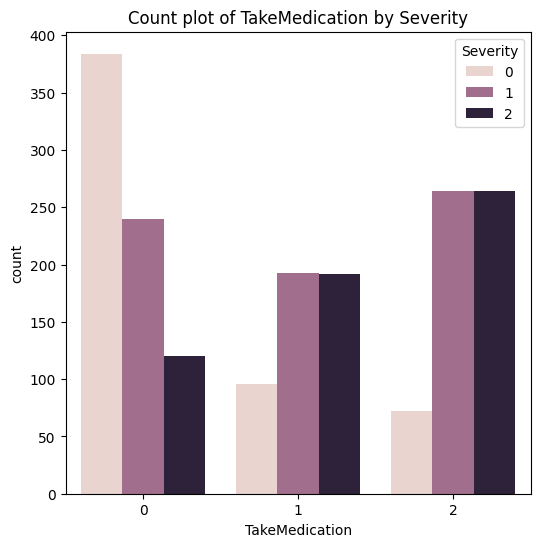

In [26]:
# Count plot of TakeMedication and Severity
plt.figure(figsize=(6, 6))
sns.countplot(x='TakeMedication', hue='Severity', data=df)
plt.title('Count plot of TakeMedication by Severity')
plt.show()

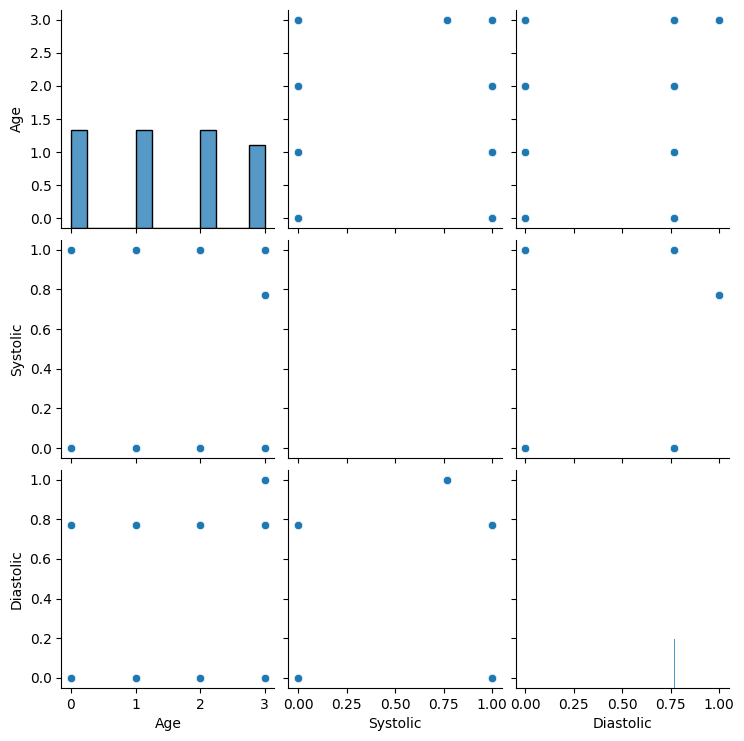

In [27]:
sns.pairplot(df[['Age', 'Systolic', 'Diastolic']])
plt.show()

In [28]:
df.drop(columns=['History', 'TakeMedication'], inplace=True)

In [29]:
df

,Gender,Age,Patient,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,0,0,0,0,1,0,0.0,0.000077,0,0
1,0,0,0,0,0,0,1,0,0.0,0.000077,0,0
2,1,1,0,0,0,0,1,0,0.0,0.000077,0,0
3,0,1,0,0,0,0,1,0,0.0,0.000077,0,0
4,1,2,0,0,0,0,1,0,0.0,0.000077,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,0,2,0,0,1,6,0.0,0.000000,0,3
1821,1,2,0,2,0,0,1,6,0.0,0.000000,0,3
1822,0,2,0,2,0,0,1,6,0.0,0.000000,0,3
1823,1,3,0,2,0,0,1,6,0.0,0.000000,0,3


In [30]:
#Splitting the data into X and Y 
X = df.drop('Stages' , axis = 1)
X

,Gender,Age,Patient,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,0,0,0,0,0,1,0,0.0,0.000077,0
1,0,0,0,0,0,0,1,0,0.0,0.000077,0
2,1,1,0,0,0,0,1,0,0.0,0.000077,0
3,0,1,0,0,0,0,1,0,0.0,0.000077,0
4,1,2,0,0,0,0,1,0,0.0,0.000077,0
...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,0,2,0,0,1,6,0.0,0.000000,0
1821,1,2,0,2,0,0,1,6,0.0,0.000000,0
1822,0,2,0,2,0,0,1,6,0.0,0.000000,0
1823,1,3,0,2,0,0,1,6,0.0,0.000000,0


In [31]:
Y = df['Stages']
Y

0       0
1       0
2       0
3       0
4       0
       ..
1820    3
1821    3
1822    3
1823    3
1824    3
Name: Stages, Length: 1825, dtype: int32

Splitting into Train and Test data

In [32]:
#splitting into training and testing dataset 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=30)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1460, 11)
(365, 11)
(1460,)
(365,)


Model Building

Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)

acc_lr = accuracy_score(y_test,y_pred)
c_lr = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_lr)
print(c_lr)

Accuracy Score:  0.8356164383561644
              precision    recall  f1-score   support

           0       0.74      0.83      0.79       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       0.56      0.42      0.48        66

    accuracy                           0.84       365
   macro avg       0.83      0.81      0.82       365
weighted avg       0.83      0.84      0.83       365



c:\Users\suchi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Classifier 

In [35]:
from sklearn.tree import DecisionTreeClassifier


decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)

acc_dt = accuracy_score(y_test,y_pred)
c_dt = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_dt)
print(c_dt)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



Random forest Classifier


In [36]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test,y_pred)
c_rf = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_rf)
print(c_rf)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



Gaussian Navie Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test,y_pred)
c_nb = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_nb)
print(c_nb)

Accuracy Score:  0.6767123287671233
              precision    recall  f1-score   support

           0       1.00      0.49      0.66       132
           1       1.00      0.62      0.76       133
           2       0.40      1.00      0.57        34
           3       0.50      1.00      0.66        66

    accuracy                           0.68       365
   macro avg       0.72      0.78      0.66       365
weighted avg       0.85      0.68      0.69       365



In [38]:
from sklearn.naive_bayes import MultinomialNB

mNB = MultinomialNB()
mNB.fit(x_train, y_train)
y_pred = NB.predict(x_test)

acc_mnb = accuracy_score(y_test,y_pred)
c_mnb = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_mnb)
print(c_mnb)

Accuracy Score:  0.6767123287671233
              precision    recall  f1-score   support

           0       1.00      0.49      0.66       132
           1       1.00      0.62      0.76       133
           2       0.40      1.00      0.57        34
           3       0.50      1.00      0.66        66

    accuracy                           0.68       365
   macro avg       0.72      0.78      0.66       365
weighted avg       0.85      0.68      0.69       365



In [39]:
model = pd.DataFrame({'Model':['Linear Regression','Decision Tree Classifier','RandomForest Classifier',
                              'Gaussian Navie Bayes','Multinomial Navie Bayes'],
                     'Score':[acc_lr,acc_dt,acc_rf,acc_nb,acc_mnb],
                      })

In [40]:
model

,Model,Score
0,Linear Regression,0.835616
1,Decision Tree Classifier,1.000000
2,RandomForest Classifier,1.000000
3,Gaussian Navie Bayes,0.676712
4,Multinomial Navie Bayes,0.676712


In [41]:
prediction = random_forest.predict([[0,3,0,2,0,0,1,6,0.0,0.0,0]])

c:\Users\suchi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
prediction[0]

3

In [43]:
if prediction[0] == 0:
    print("NORMAL")
elif prediction[0] == 1:
    print("HYPERTENSION (Stage-1)")
elif prediction[0] == 2:
    print('HYPERTENSION (Stage-2)')
else:
    print('HYPERTENSIVE CRISIS')

HYPERTENSIVE CRISIS


In [44]:
import pickle
import warnings
pickle.dump(random_forest,open("model.pkl" , "wb"))